<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/5_update_hyperparams/1_model_params/6)%20Append%20additional%20custom%20layers%20to%20base%20trasfer%20learning%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to add custom layers and activation to transfer learning base model

# Table of Contents


## [0. Install](#0)


## [1. Load experiment with resnet defaults](#1)


## [2. Remove preset additonal layers and add your own custom layer stack](#2)


## [3. Train](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2457 (delta 27), reused 0 (delta 0), pack-reused 2404
Receiving objects: 100% (2457/2457), 78.20 MiB | 3.29 MiB/s, done.
Resolving deltas: 100% (1362/1362), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Weather Classification
    - https://data.mendeley.com/datasets/4drtyfjtfy/1

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pxe_AmHYXwpTMRkMVwGeFgHS8ZpkzwMJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pxe_AmHYXwpTMRkMVwGeFgHS8ZpkzwMJ" -O weather.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq weather.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load experiment with resnet defaults 

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "add-custom-last-layers");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: add-custom-last-layers
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.2_docs/study_roadmaps/1_getting_started_roadmap/5_update_mode/1_model_params/workspace/Project/add-custom-last-layers/



In [4]:
gtf.Default(dataset_path="weather/train", 
            model_name="resnet18_v1", 
            freeze_base_network=True,  # If True, then freeze base 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     weather/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 781
    Num val images:   336
    Num classes:      4

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layer

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


### Current preset last layers

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8081)

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8081


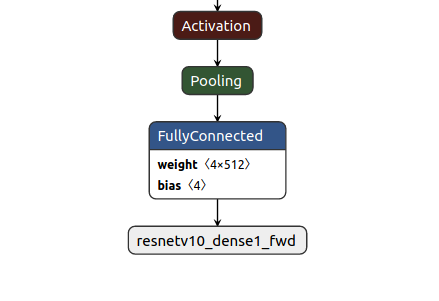

In [6]:
from IPython.display import Image
Image(filename='imgs/preset_layers.png')

<a id='2'></a>
# Remove preset additonal layers and add your own custom layer stack

In [9]:
# List layers
gtf.List_Layers_Transfer_Learning()

Layers List for transfer learning: 
    1. append_linear
    2. append_dropout



In [10]:
# List activations
gtf.List_Activations_Transfer_Learning()

Activations List for transfer learning: 
    1. append_elu
    2. append_leakyrelu
    3. append_prelu
    4. append_relu
    5. append_selu
    6. append_selu
    7. append_sigmoid
    8. append_softplus
    9. append_tanh
    10. append_softmax
    11. append_swish



In [11]:
gtf.append_linear(num_neurons=1024);
gtf.append_relu();
gtf.append_dropout(probability=0.1);
gtf.append_linear(final_layer=True);

In [12]:
gtf.Reload();

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 781
    Num val images:   336
    Num classes:      4

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  42
        Num of actual trainable layers:       2



### Updated last layers

In [13]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082)

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


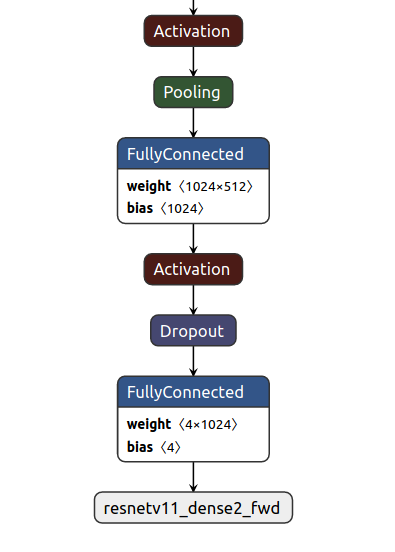

In [14]:
from IPython.display import Image
Image(filename='imgs/preset_layers_new.png')

<a id='3'></a>
# Train

In [15]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.613, Train-loss: 0.970 | Val-acc: 0.717262, Val-loss: 0.723, | time: 5.2 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.767, Train-loss: 0.614 | Val-acc: 0.821429, Val-loss: 0.527, | time: 5.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.791, Train-loss: 0.562 | Val-acc: 0.708333, Val-loss: 0.701, | time: 4.9 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.809, Train-loss: 0.519 | Val-acc: 0.821429, Val-loss: 0.547, | time: 4.7 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.812, Train-loss: 0.509 | Val-acc: 0.824405, Val-loss: 0.476, | time: 4.6 sec

    Training completed in: 0m 23s
    Best val Acc:          0.824405

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.2_docs/study_roadmaps/1_getting_started_roadmap/5_update_mode/1_model_params/workspace/Project/add-custom-last-layers/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.2_docs/study_roadmaps/1_getting_started_roadmap/5_update_mode/1_model_params/workspace/Project/add-custom-last-layers/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history l

<Figure size 432x288 with 0 Axes>